Epoch 1/50
5/5 [==============================] - 4s 119ms/step - loss: 0.7414 - accuracy: 0.4667 - val_loss: 0.6880 - val_accuracy: 0.5238
Epoch 2/50
5/5 [==============================] - 0s 109ms/step - loss: 0.6878 - accuracy: 0.5091 - val_loss: 0.6942 - val_accuracy: 0.4762
Epoch 3/50
5/5 [==============================] - 0s 93ms/step - loss: 0.6720 - accuracy: 0.5273 - val_loss: 0.6625 - val_accuracy: 0.4762
Epoch 4/50
5/5 [==============================] - 1s 97ms/step - loss: 0.6342 - accuracy: 0.7030 - val_loss: 0.6196 - val_accuracy: 0.7619
Epoch 5/50
5/5 [==============================] - 1s 121ms/step - loss: 0.6236 - accuracy: 0.6242 - val_loss: 0.6119 - val_accuracy: 0.6667
Epoch 6/50
5/5 [==============================] - 0s 111ms/step - loss: 0.6144 - accuracy: 0.6182 - val_loss: 0.6405 - val_accuracy: 0.5238
Epoch 7/50
5/5 [==============================] - 1s 96ms/step - loss: 0.5626 - accuracy: 0.7273 - val_loss: 0.5316 - val_accuracy: 0.8095
Epoch 8/50
5/5 [=======

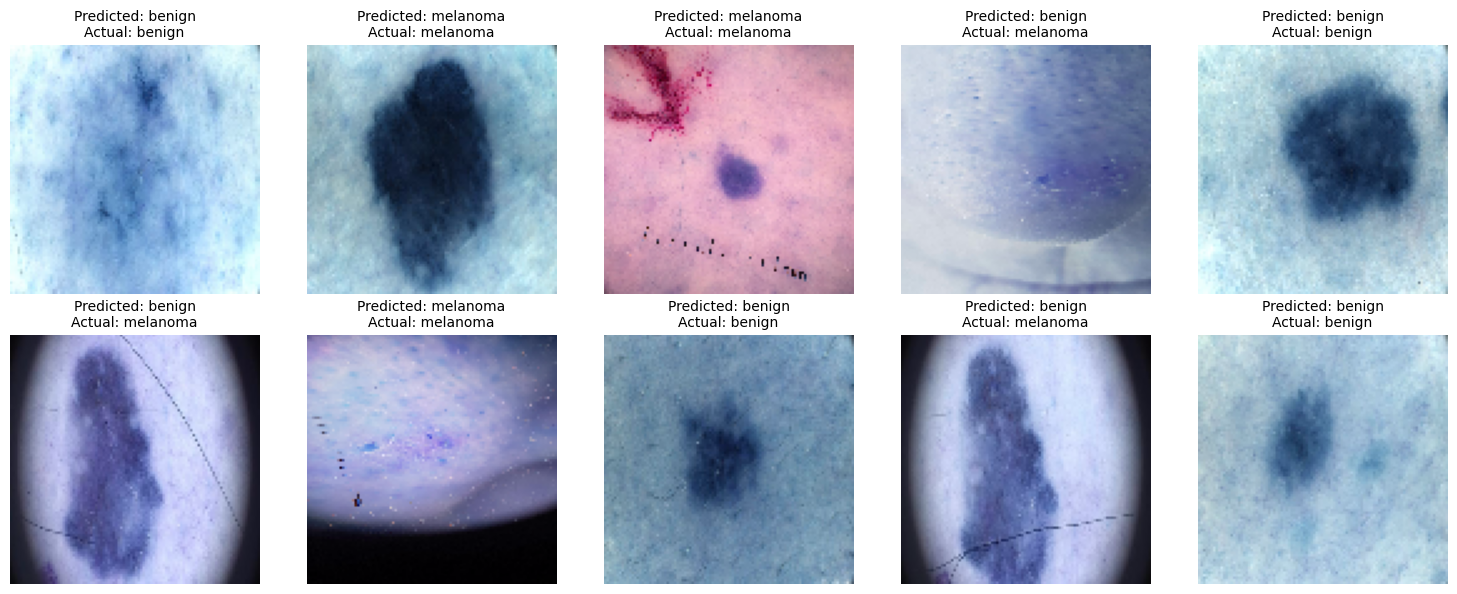

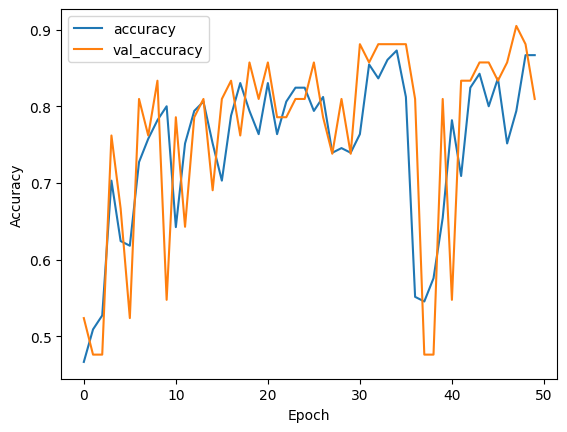

In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Define function to load and resize images from a directory
def load_and_resize_images_from_folder(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize the image to a common size
            images.append(img)
    return images

# Load and resize images from malignant (melanoma) and benign folders
melanoma_images = load_and_resize_images_from_folder('/content/drive/MyDrive/Image processing/Skin Melanoma/Malignant')
benign_images = load_and_resize_images_from_folder('/content/drive/MyDrive/Image processing/Skin Melanoma/Benign')

# Create labels for the images (1 for melanoma, 0 for benign)
melanoma_labels = np.ones(len(melanoma_images))
benign_labels = np.zeros(len(benign_images))

# Combine images and labels
X = np.array(melanoma_images + benign_images)
y = np.concatenate((melanoma_labels, benign_labels))

# Normalize pixel values to [0, 1]
X = X / 255.0

# Convert labels to categorical one-hot encoding
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(2, activation='softmax')  # Output layer with 2 classes: melanoma and benign
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=50,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Predict classes for test images
y_pred = np.argmax(model.predict(X_test), axis=1)

# Select a few test images for visualization
selected_test_images = X_test[:10]
selected_predictions = y_pred[:10]
selected_labels = y_test[:10]

# Define class labels
class_labels = ['benign', 'melanoma']

# Display the marked test images along with predictions
plt.figure(figsize=(15, 6))
for i in range(len(selected_test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_test_images[i])
    plt.title(f'Predicted: {class_labels[selected_predictions[i]]}\nActual: {class_labels[np.argmax(selected_labels[i])]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/50
6/6 [==============================] - 13s 788ms/step - loss: 0.9351 - accuracy: 0.5273 - val_loss: 0.7021 - val_accuracy: 0.5238
Epoch 2/50
6/6 [==============================] - 1s 141ms/step - loss: 0.8979 - accuracy: 0.4727 - val_loss: 0.6814 - val_accuracy: 0.4762
Epoch 3/50
6/6 [==============================] - 1s 180ms/step - loss: 0.7238 - accuracy: 0.5273 - val_loss: 0.6725 - val_accuracy: 0.4762
Epoch 4/50
6/6 [==============================] - 1s 150ms/step - loss: 0.7479 - accuracy: 0.4667 - val_loss: 0.6549 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 1s 120ms/step - loss: 0.7831 - accuracy: 0.4848 - val_loss: 0.7604 - val_accuracy: 0.4762
Epoch 6/50
6/6 [==============================] - 1s 116ms/step - loss: 0.7136 - accuracy: 0.4909 - val_loss: 0.6855 - val_accuracy: 0.5476
Epoch 7/50
6/6 [==============================] - 1s 112ms/step - loss: 0.6667 - accuracy: 0.5

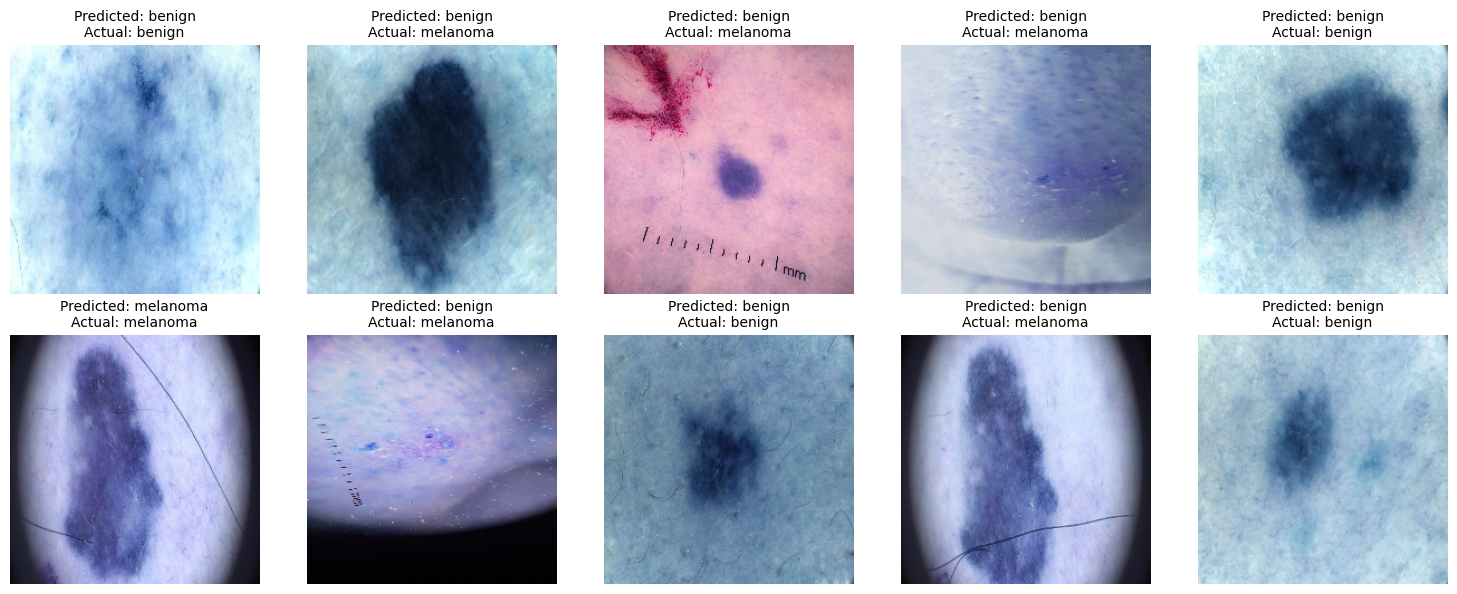

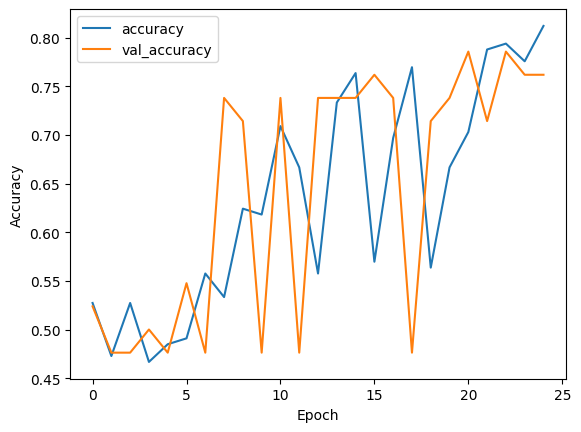

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Define function to load and resize images from a directory
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize the image to a common size
            images.append(img)
    return images

# Load and resize images from malignant (melanoma) and benign folders
melanoma_images = load_and_resize_images_from_folder('/content/drive/MyDrive/Image processing/Skin Melanoma/Malignant')
benign_images = load_and_resize_images_from_folder('/content/drive/MyDrive/Image processing/Skin Melanoma/Benign')

# Create labels for the images (1 for melanoma, 0 for benign)
melanoma_labels = np.ones(len(melanoma_images))
benign_labels = np.zeros(len(benign_images))

# Combine images and labels
X = np.array(melanoma_images + benign_images)
y = np.concatenate((melanoma_labels, benign_labels))

# Normalize pixel values to [0, 1]
X = X / 255.0

# Convert labels to categorical one-hot encoding
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load ResNet50 with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classifier layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Predict classes for test images
y_pred = np.argmax(model.predict(X_test), axis=1)

# Select a few test images for visualization
selected_test_images = X_test[:10]
selected_predictions = y_pred[:10]
selected_labels = y_test[:10]

# Define class labels
class_labels = ['benign', 'melanoma']

# Display the marked test images along with predictions
plt.figure(figsize=(15, 6))
for i in range(len(selected_test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_test_images[i])
    plt.title(f'Predicted: {class_labels[selected_predictions[i]]}\nActual: {class_labels[np.argmax(selected_labels[i])]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
print(cv2.__version__)

4.8.0
